In [3]:
#Parte 1 punto 2a
import pandas as pd
import numpy as np

# Cargar los datos con parámetros robustos
def cargar_datos():
    try:
        df_2004 = pd.read_stata("usu_individual_T104.dta", convert_categoricals=False)
        df_2024 = pd.read_excel("usu_individual_T124.xlsx")
        return df_2004, df_2024
    except Exception as e:
        print(f"Error al cargar archivos: {str(e)}")
        return None, None

# Filtrar y preparar los datos
def preparar_datos(df_2004, df_2024):
    # Filtrar Neuquén-Plottier
    neuquen_2004 = df_2004[df_2004['aglomerado'] == 17].copy()
    neuquen_2024 = df_2024[df_2024['AGLOMERADO'] == 17].copy()
    
    # Estandarizar nombres
    neuquen_2024.columns = neuquen_2024.columns.str.lower().str.strip().str.replace(' ', '_')
    
    # Identificar columnas comunes con datos
    columnas_comunes = []
    for col in set(neuquen_2004.columns) & set(neuquen_2024.columns):
        if not (neuquen_2004[col].isna().all() and neuquen_2024[col].isna().all()):
            columnas_comunes.append(col)
    
    # Asegurar compatibilidad de tipos
    for col in columnas_comunes:
        try:
            if neuquen_2004[col].dtype != neuquen_2024[col].dtype:
                neuquen_2024[col] = neuquen_2024[col].astype(neuquen_2004[col].dtype)
        except:
            try:
                neuquen_2004[col] = neuquen_2004[col].astype(neuquen_2024[col].dtype)
            except:
                print(f"No se pudo igualar el tipo para {col}")
                columnas_comunes.remove(col)
    
    # Añadir año 
    neuquen_2004['año'] = 2004
    neuquen_2024['año'] = 2024
    
    if 'trimestre' not in columnas_comunes:
        if 'trimestre' in neuquen_2004.columns:
            columnas_comunes.append('trimestre')
        elif 'trimestre' in neuquen_2024.columns:
            columnas_comunes.append('trimestre')
        else:
            print("Advertencia: No se encontró columna 'trimestre'")
    
    return neuquen_2004, neuquen_2024, columnas_comunes

# Función para guardar en Excel
def guardar_excel(df_2004, df_2024, df_completo, columnas_comunes):
    try:
        with pd.ExcelWriter("EPH_Neuquen_Plottier_2004_2024.xlsx") as writer:
            # Hoja completa
            df_completo.to_excel(writer, sheet_name='Datos Completos', index=False)
            
            # Hoja resumen
            pd.DataFrame({
                'Año': [2004, 2024],
                'Registros': [len(df_2004), len(df_2024)],
                'Columnas': [len(columnas_comunes), len(columnas_comunes)]
            }).to_excel(writer, sheet_name='Resumen', index=False)
            
            # Hojas por año
            df_completo[df_completo['año'] == 2004].to_excel(
                writer, sheet_name='2004', index=False)
            
            df_completo[df_completo['año'] == 2024].to_excel(
                writer, sheet_name='2024', index=False)
        
        print("Archivo Excel creado")
        return True
    except Exception as e:
        print(f"Error al guardar Excel: {str(e)}")
        return False
#Ejecucion 
if __name__ == "__main__":
    # Cargar datos
    df_2004, df_2024 = cargar_datos()
    if df_2004 is None or df_2024 is None:
        exit()
    
    # Preparar datos
    neuquen_2004, neuquen_2024, columnas_comunes = preparar_datos(df_2004, df_2024)
    
    # Concatenar para evitar errores
    datos_completos = pd.concat([
        neuquen_2004[columnas_comunes + ['año']],
        neuquen_2024[columnas_comunes + ['año']]
    ], ignore_index=True, sort=False)
    
    # Guardar
    if guardar_excel(neuquen_2004, neuquen_2024, datos_completos, columnas_comunes):
        print(f"\nRegistros 2004: {len(neuquen_2004)}")
        print(f"Registros 2024: {len(neuquen_2024)}")
        print(f"Total unificado: {len(datos_completos)}")
        print("\nHojas en el archivo:")
        print("1. 'Datos Completos': Todos los datos unificados")
        print("2. 'Resumen': Estadísticas básicas")
        print("3. '2004': Solo datos de 2004")
        print("4. '2024': Solo datos de 2024")
    else:
        # CSV si falla Excel
        datos_completos.to_csv("EPH_Neuquen_Plottier_2004_2024.csv", index=False)
        print("Se guardó como CSV alternativo")

Archivo Excel creado

Registros 2004: 779
Registros 2024: 1160
Total unificado: 1939

Hojas en el archivo:
1. 'Datos Completos': Todos los datos unificados
2. 'Resumen': Estadísticas básicas
3. '2004': Solo datos de 2004
4. '2024': Solo datos de 2024


In [34]:
#Parte 1 punto 2b
#Ponemos todos los nombres de las columnas en maypusculas para evitar errores futuros
df_2004_neuquen.columns = df_2004_neuquen.columns.str.upper()
df_2024_neuquen.columns = df_2024_neuquen.columns.str.upper()

# Seleccionar 15 variables clave
variables_interes = [
    'CH04', 'CH06', 'ESTADO', 'NIVEL_ED', 'IPCF', 'PP07H', 
    'PP07I', 'V2_M', 'V5_M', 'V8_M', 'V12_M', 'P21', 'CAT_INAC', 'CH07', 'CH08'
]

# Verificar NA por año
na_2004 = df_2004_neuquen[variables_interes].isna().sum().rename("NA_2004")
na_2024 = df_2024_neuquen[variables_interes].isna().sum().rename("NA_2024")
tabla_na = pd.concat([na_2004, na_2024], axis=1)

# Mostrar tabla
print("VALORES FALTANTES POR AÑO:")
display(tabla_na)


VALORES FALTANTES POR AÑO:


,NA_2004,NA_2024
CH04,0,0
CH06,0,0
ESTADO,0,124
NIVEL_ED,0,0
IPCF,0,0
PP07H,0,601
PP07I,0,601
V2_M,0,944
V5_M,0,1126
V8_M,0,1142


In [13]:
#Parte 1 punto 2c
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype

# Función de Carga y Filtrado
def cargar_y_filtrar_datos():
    """Carga y filtra los datos para Neuquén-Plottier"""
    try:
        # Cargar datos con manejo de tipos explícito
        df_2004 = pd.read_stata("usu_individual_T104.dta", convert_categoricals=False)
        df_2024 = pd.read_excel("usu_individual_T124.xlsx")
        
        # Filtrar Neuquén-Plottier (AGLOMERADO=17)
        df_2004 = df_2004[df_2004['aglomerado'] == 17].copy()
        df_2024 = df_2024[df_2024['AGLOMERADO'] == 17].copy()
        
        # Estandarizar nombres de columnas y eliminar columnas completamente vacías
        df_2024.columns = df_2024.columns.str.lower()
        df_2004 = df_2004.dropna(axis=1, how='all')
        df_2024 = df_2024.dropna(axis=1, how='all')
        
        return df_2004, df_2024
        
    except Exception as e:
        print(f"Error al cargar datos: {str(e)}")
        return None, None

# Función de Limpieza de Datos
def limpiar_datos_eph(df):
  
    # Manejo de valores faltantes
    df = df.replace({' ': np.nan, '': np.nan, 'NaN': np.nan, 'NA': np.nan})
    
    # Corrección de valores atípicos en ingresos (valores negativos)
    if 'p21' in df.columns:  # Ingreso principal
        df['p21'] = df['p21'].apply(lambda x: np.nan if x < 0 else x)
    
    if 'ipcf' in df.columns:  # Ingreso per cápita familiar
        df['ipcf'] = df['ipcf'].apply(lambda x: np.nan if x < 0 else x)
    
    # Estandarización de variables categóricas importantes
    cat_vars = ['estado', 'cat_ocup', 'nivel_ed', 'ch04']  # Ajustar según tus variables
    for var in cat_vars:
        if var in df.columns:
            df[var] = df[var].astype('category')
    
    return df

# Función de Concatenación
def concatenar_dataframes(df1, df2):
    """Concatena dataframes manejando columnas comunes no vacías"""
    # Identificar columnas comunes no vacías
    common_cols = [col for col in df1.columns.intersection(df2.columns)
                  if not (df1[col].isna().all() and df2[col].isna().all())]
    
    # Filtrar y concatenar
    return pd.concat([
        df1[common_cols],
        df2[common_cols]
    ], ignore_index=True)

# Función de Exportación
def exportar_a_excel(df, filename):
    """Exporta el dataframe a Excel con manejo de errores"""
    try:
        df.to_excel(filename, index=False, engine='openpyxl')
        return True
    except Exception as e:
        print(f"Error al exportar a Excel: {str(e)}")
        return False

# Ejecución 
if __name__ == "__main__":
    print("PROCESO DE LIMPIEZA EPH - NEUQUÉN-PLOTTIER")
    
    # Cargar y filtrar datos
    df_2004, df_2024 = cargar_y_filtrar_datos()
    if df_2004 is None or df_2024 is None:
        exit()
    
    # Limpiar datos
    df_2004_clean = limpiar_datos_eph(df_2004)
    df_2024_clean = limpiar_datos_eph(df_2024)
    
    # Unificar
    df_2004_clean['año'] = 2004
    df_2024_clean['año'] = 2024
    df_final = concatenar_dataframes(df_2004_clean, df_2024_clean)
    
    # Exportar
    if not exportar_a_excel(df_final, "EPH_Neuquen_Plottier_Limpio.xlsx"):
        df_final.to_csv("EPH_Neuquen_Plottier_Limpio.csv", index=False, encoding='utf-8-sig')
        print("Se guardó como CSV alternativo")
    
    # Resumen
    print("\nRESULTADOS")
    print(f"Registros 2004: {len(df_2004_clean)}")
    print(f"Registros 2024: {len(df_2024_clean)}")
    print(f"Total registros: {len(df_final)}")
    print(f"Columnas en el archivo final: {len(df_final.columns)}")


PROCESO DE LIMPIEZA EPH - NEUQUÉN-PLOTTIER


C:\Users\Fran\AppData\Local\Temp\ipykernel_36284\36504431.py:38: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({' ': np.nan, '': np.nan, 'NaN': np.nan, 'NA': np.nan})



RESULTADOS
Registros 2004: 779
Registros 2024: 1160
Total registros: 1939
Columnas en el archivo final: 167


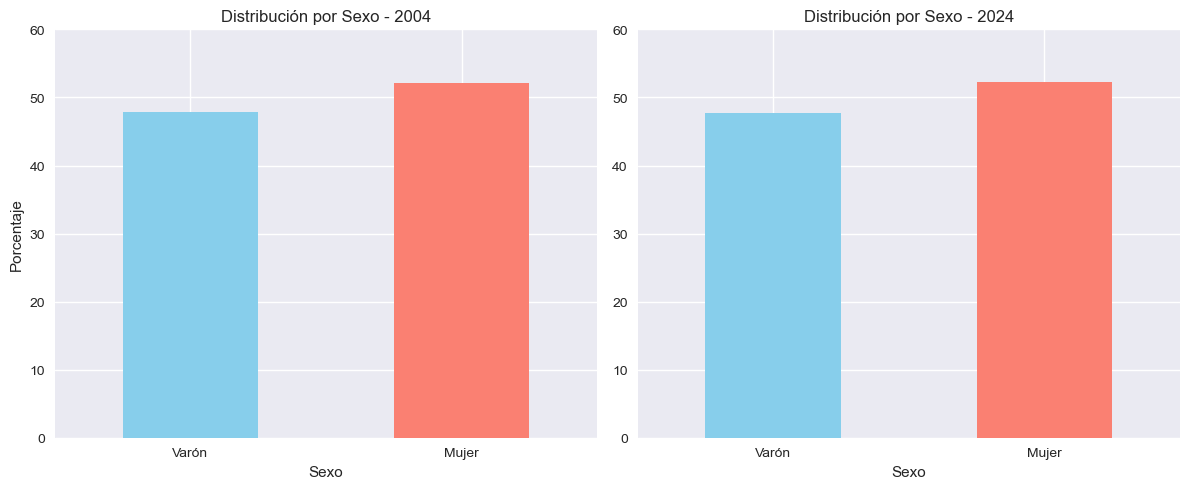

In [40]:
#Parte 2 punto 3
import matplotlib.pyplot as plt

# Configuración inicial (usando un estilo moderno de Seaborn)
plt.style.use('seaborn-v0_8')  
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Datos 2004
sexo_2004 = df_2004_clean['ch04'].value_counts(normalize=True).sort_index() * 100
sexo_2004.plot(kind='bar', ax=axes[0], color=['skyblue', 'salmon'])
axes[0].set_title('Distribución por Sexo - 2004')
axes[0].set_xlabel('Sexo')
axes[0].set_ylabel('Porcentaje')
axes[0].set_xticklabels(['Varón', 'Mujer'], rotation=0)
axes[0].set_ylim(0, 60)

# Datos 2024
sexo_2024 = df_2024_clean['ch04'].value_counts(normalize=True).sort_index() * 100
sexo_2024.plot(kind='bar', ax=axes[1], color=['skyblue', 'salmon'])
axes[1].set_title('Distribución por Sexo - 2024')
axes[1].set_xlabel('Sexo')
axes[1].set_xticklabels(['Varón', 'Mujer'], rotation=0)
axes[1].set_ylim(0, 60)

plt.tight_layout()
plt.savefig('composicion_sexo.png', dpi=300)
plt.show()

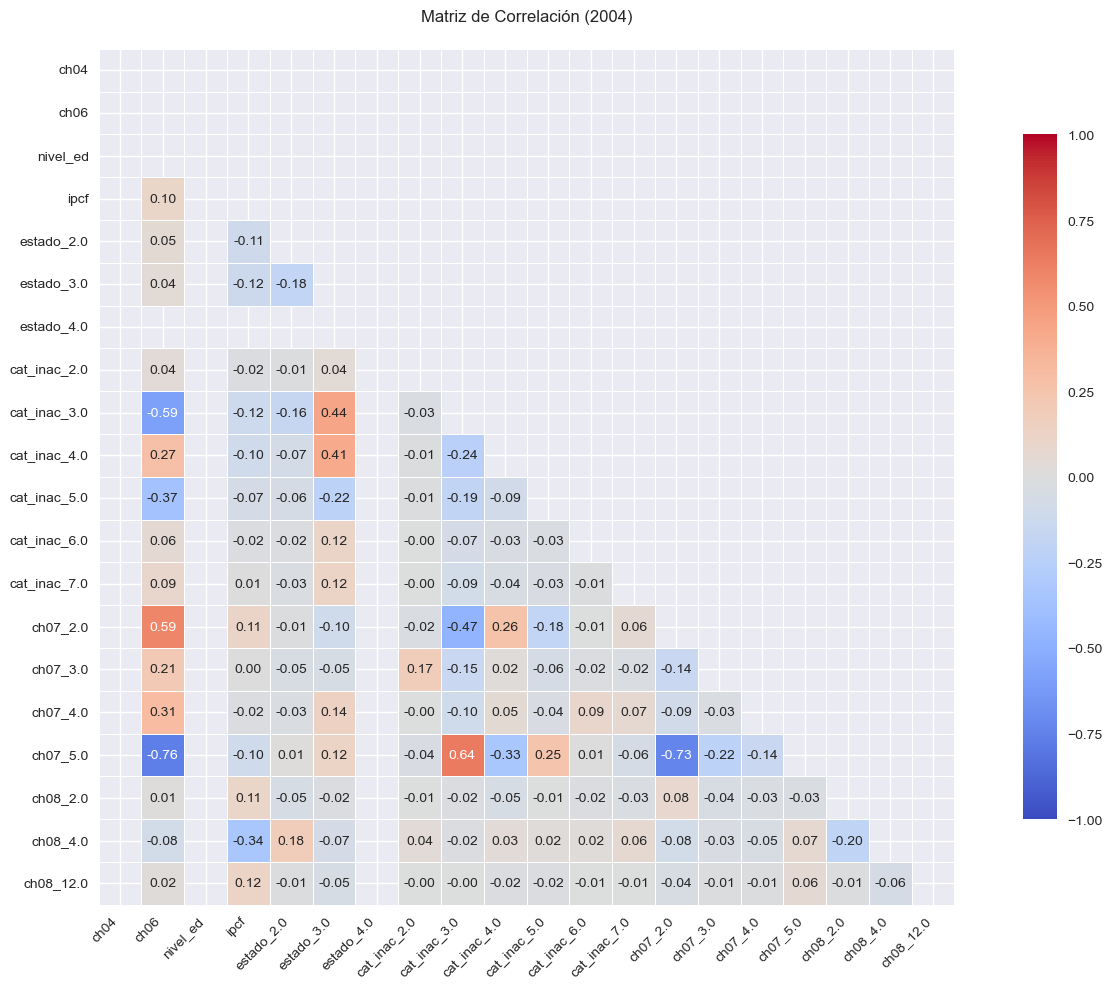

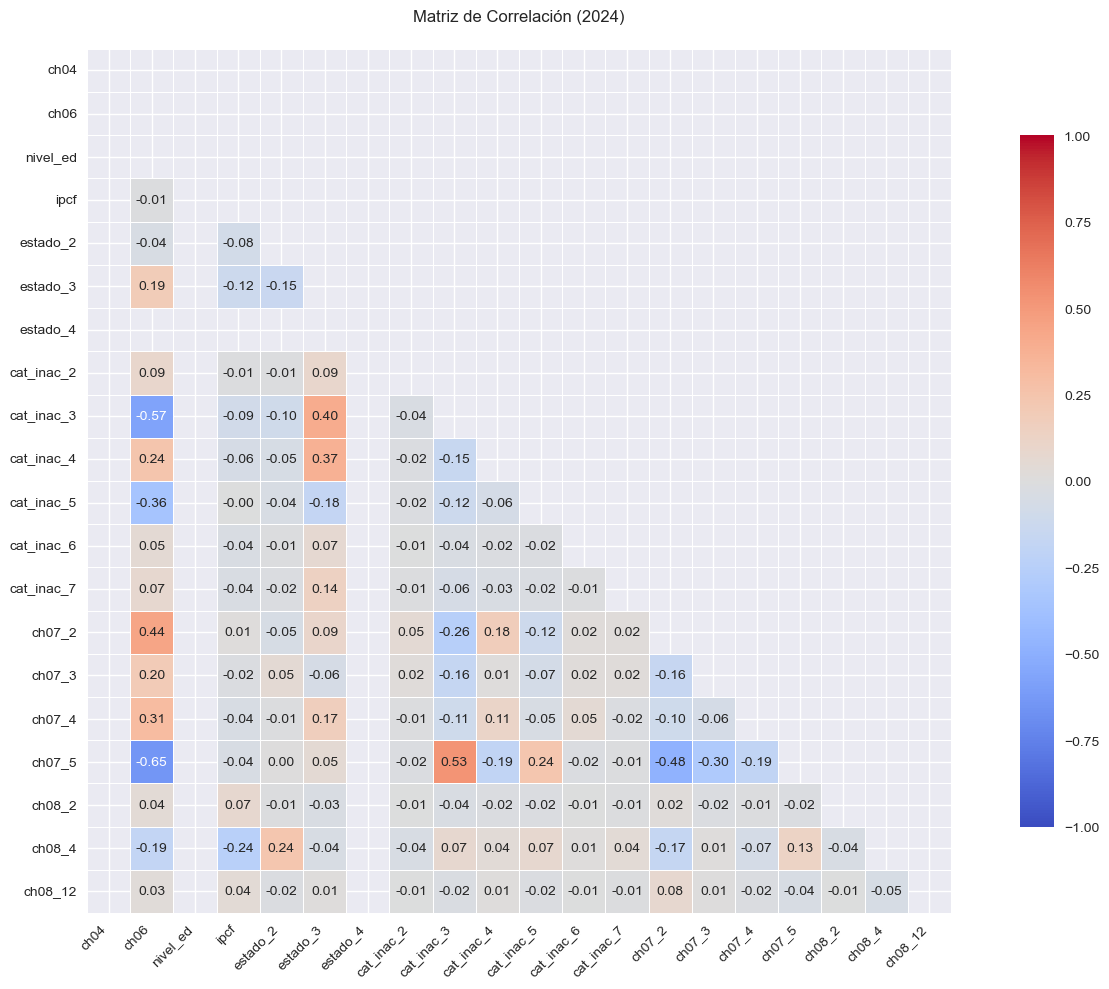

In [54]:
#Parte 2 punto 4
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Lista de variables originales
vars_corr = ['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf']

# Codificamos variables categóricas
def encode_categorical(df):
    df_encoded = df.copy()
    
    df_encoded['ch04'] = df_encoded['ch04'].map({'Varón': 0, 'Mujer': 1})
    
  
    if 'nivel_ed' in df_encoded.columns:
        df_encoded['nivel_ed'] = df_encoded['nivel_ed'].map({
            'Primaria': 1,
            'Secundaria': 2,
            'Universidad': 3
        })
    
    # Otras variables categóricas 
    categorical_vars = ['estado', 'cat_inac', 'ch07', 'ch08'] 
    df_encoded = pd.get_dummies(df_encoded, columns=categorical_vars, drop_first=True)
    
    return df_encoded

# Aplicar a ambos años
df_2004_encoded = encode_categorical(df_2004_clean)
df_2024_encoded = encode_categorical(df_2024_clean)

# Columnas numericas relevantes
def get_numeric_vars(df, original_vars):
    # Selecciona columnas que empiezan con los nombres originales (incluye dummies)
    all_columns = df.columns
    selected_columns = [col for col in all_columns 
                       if any(col.startswith(var) for var in original_vars)]
    return df[selected_columns]

# Grafico
def plot_correlation_heatmap(df, year, figsize=(14, 10)):
    plt.figure(figsize=figsize)
    corr = df.corr()
    
    # Máscara para ocultar la diagonal superior para leer con mas facilidad
    mask = np.triu(np.ones_like(corr, dtype=bool))
    
    sns.heatmap(
        corr, 
        annot=True, 
        fmt=".2f", 
        cmap='coolwarm', 
        center=0, 
        vmin=-1, 
        vmax=1, 
        mask=mask,
        square=True, 
        linewidths=0.5,
        cbar_kws={"shrink": 0.8}
    )
    plt.title(f'Matriz de Correlación ({year})', pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(f'correlacion_completa_{year}.png', dpi=300, bbox_inches='tight')
    plt.show()

# Aplicar a 2004 y 2024
plot_correlation_heatmap(get_numeric_vars(df_2004_encoded, vars_corr), '2004')
plot_correlation_heatmap(get_numeric_vars(df_2024_encoded, vars_corr), '2024')

In [50]:
# Parte 3

import pandas as pd
import numpy as np

# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)

# Carga y preparación de datos

try:
    # Cargar archivos 
    df_2004 = pd.read_stata("usu_individual_T104.dta")
    df_2024 = pd.read_excel("usu_individual_T124.xlsx")
    
    # Estandarizar nombres de columnas entre años
    df_2004 = df_2004.rename(columns={
        'aglomerado': 'AGLOMERADO',
        'ch04': 'CH04', 
        'ch06': 'CH06',
        'estado': 'ESTADO',
        'p21': 'P21',
        'ipcf': 'IPCF'
    })
    
    # Filtrar solo Neuquén-Plottier
    
    neuquen_2004 = df_2004[df_2004['AGLOMERADO'] == 17].copy()
    neuquen_2024 = df_2024[df_2024['AGLOMERADO'] == 17].copy()
    
    # Agregar columna de año
    neuquen_2004['ANIO'] = 2004
    neuquen_2024['ANIO'] = 2024
    
    # Combinar ambos años
    neuquen_total = pd.concat([neuquen_2004, neuquen_2024], ignore_index=True)
    

    # 5. Análisis por estado de actividad
    
    print("RESULTADOS PREGUNTA 5")

    
    # Filtrar solo quienes respondieron sobre actividad
    con_respuesta = neuquen_total[neuquen_total['ESTADO'] != 0]
    
    # Calcular estadísticas solicitadas
    stats = con_respuesta.groupby(['ANIO', 'ESTADO']).agg(
        Cantidad=('ESTADO', 'count'),
        IPCF_Promedio=('IPCF', 'mean')
    ).reset_index()
    
    
    stats['ESTADO'] = stats['ESTADO'].map({
        1: 'Ocupado',
        2: 'Desocupado',
        3: 'Inactivo'
    })
    
    stats['IPCF_Promedio'] = stats['IPCF_Promedio'].round(2)
    
    print("\nEstadísticas por estado de actividad:")
    print(stats.to_string(index=False))
    
    # Resumen adicional
    resumen = con_respuesta.groupby('ANIO')['ESTADO'].value_counts().unstack()
    resumen.columns = ['Ocupado', 'Desocupado', 'Inactivo']
    
    print("\nCantidad de personas por estado:")
    print(resumen)
    
    # 6. Manejo de no respuesta
    
    print("\n" + "="*50)
    print("RESULTADOS PREGUNTA 6")
    print("="*50)
    
    # Separar en respondieron/norespondieron
    norespondieron = neuquen_total[neuquen_total['ESTADO'] == 0]
    respondieron = neuquen_total[neuquen_total['ESTADO'] != 0]
    
    # Estadísticas de no respuesta
    no_respuesta_stats = norespondieron.groupby('ANIO').size()
    print("\nPersonas que NO respondieron sobre su condición de actividad:")
    print(no_respuesta_stats)
    
    # Porcentaje de no respuesta
    total_por_anio = neuquen_total.groupby('ANIO').size()
    porcentaje_no_respuesta = (no_respuesta_stats / total_por_anio * 100).round(2)
    
    print("\nPorcentaje de no respuesta:")
    print(porcentaje_no_respuesta)
    
    # Exportar resultados
    
    print("\nGuardando archivos...")
    
    # Guardar bases solicitadas
    respondieron.to_csv('respondieron_neuquen.csv', index=False, encoding='utf-8-sig')
    norespondieron.to_csv('norespondieron_neuquen.csv', index=False, encoding='utf-8-sig')
    
    # Guardar estadísticas en Excel
    with pd.ExcelWriter('resultados_eph_neuquen.xlsx') as writer:
        stats.to_excel(writer, sheet_name='Pregunta5_Estadisticas', index=False)
        resumen.to_excel(writer, sheet_name='Pregunta5_Resumen')
        no_respuesta_stats.to_excel(writer, sheet_name='Pregunta6_NoRespuesta')
    
    print("\nProceso completado exitosamente!")
    print("Archivos generados:")
    print("- respondieron_neuquen.csv")
    print("- norespondieron_neuquen.csv")
    print("- resultados_eph_neuquen.xlsx")

except FileNotFoundError as e:
    print(f"\nERROR: No se encontró el archivo {str(e)}")
    print("Asegúrate de tener los archivos en el mismo directorio:")
    print("- usu_individual_T104.dta")
    print("- usu_individual_T124.xlsx")



RESULTADOS PREGUNTA 5

Estadísticas por estado de actividad:
 ANIO     ESTADO  Cantidad  IPCF_Promedio
 2024    Ocupado       559      253504.57
 2024 Desocupado        40       83831.25
 2024   Inactivo       437      159883.30
 2024        NaN       124      159938.84

ERROR inesperado: Length mismatch: Expected axis has 4 elements, new values have 3 elements



Columnas 2004: ['CODUSU', 'nro_hogar', 'componente', 'h15', 'ano4', 'trimestre', 'region', 'mas_500', 'aglomerado', 'pondera', 'ch03', 'ch04', 'ch06', 'ch07', 'ch08', 'ch09', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch15_cod', 'ch16', 'ch16_cod', 'nivel_ed', 'estado', 'cat_ocup', 'cat_inac', 'pp02c1', 'pp02c2', 'pp02c3', 'pp02c4', 'pp02c5', 'pp02c6', 'pp02c7', 'pp02c8', 'pp02e', 'pp02h', 'pp02i', 'pp03c', 'pp03d', 'pp3e_tot', 'pp3f_tot', 'pp03g', 'pp03h', 'pp03i', 'pp03j', 'intensi', 'pp04a', 'pp04b_cod', 'pp04b1', 'pp04b2', 'pp04b3_mes', 'pp04b3_ano', 'pp04b3_dia', 'pp04c', 'pp04c99', 'pp04d_cod', 'pp04g', 'pp05b2_mes', 'pp05b2_ano', 'pp05b2_dia', 'pp05c_1', 'pp05c_2', 'pp05c_3', 'pp05e', 'pp05f', 'pp05h', 'pp06a', 'pp06c', 'pp06d', 'pp06e', 'pp06h', 'pp07a', 'pp07c', 'pp07d', 'pp07e', 'pp07f1', 'pp07f2', 'pp07f3', 'pp07f4', 'pp07f5', 'pp07g1', 'pp07g2', 'pp07g3', 'pp07g4', 'pp07g_59', 'pp07h', 'pp07i', 'pp07j', 'pp07k', 'pp08d1', 'pp08d4', 'pp08f1', 'pp08f2', 'pp08j1', 'pp08

<Figure size 3000x1800 with 0 Axes>

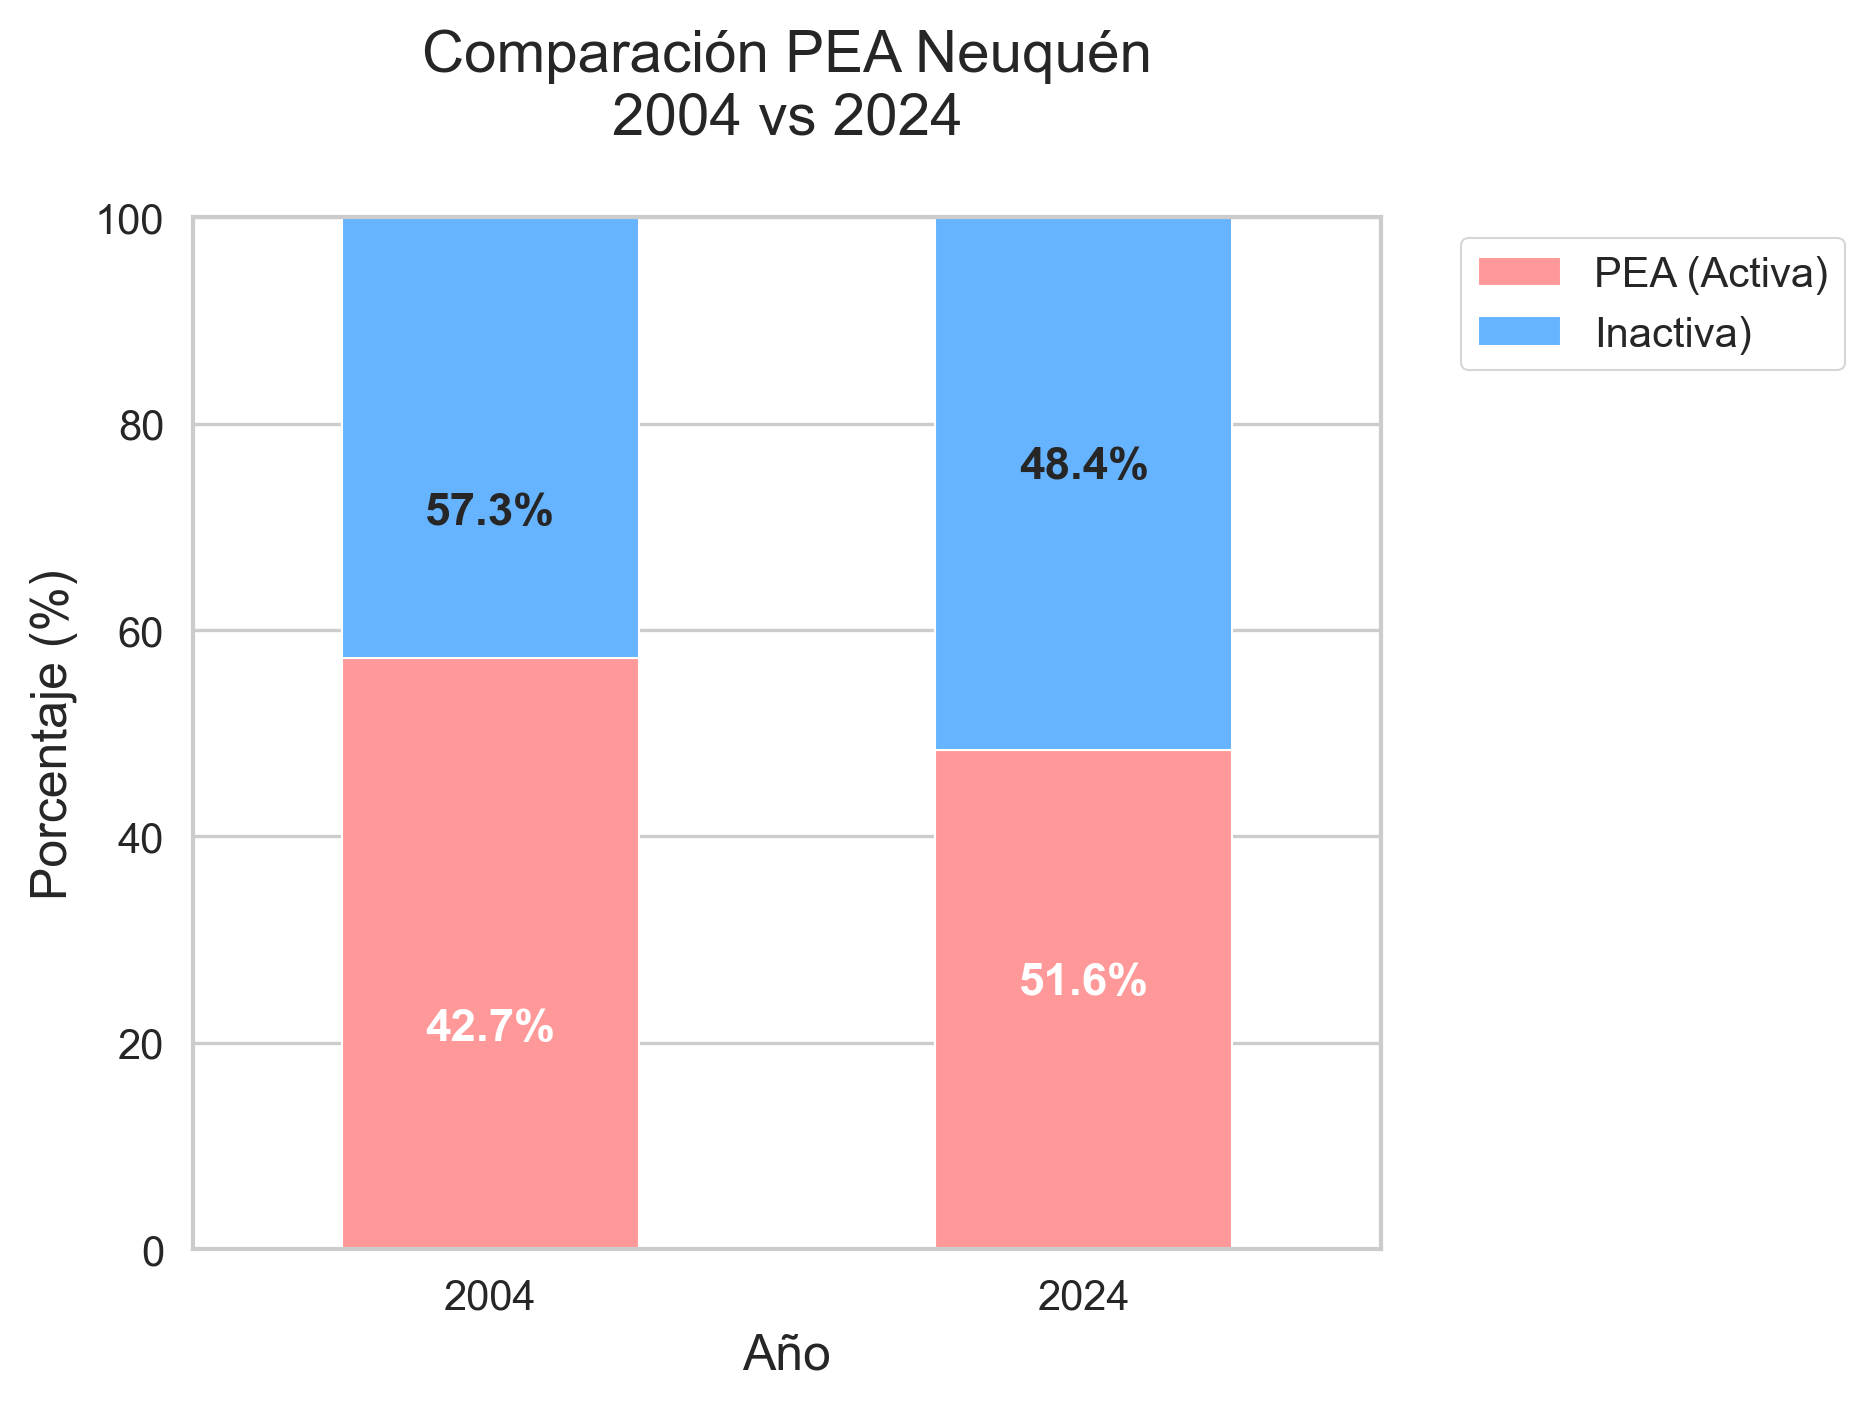


Datos guardados en 'respondieron_neuquen.csv'
Gráfico guardado como 'pea_comparacion.png'


In [51]:
#Punto 6
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df_2004 = pd.read_stata("usu_individual_T104.dta", convert_categoricals=False)
df_2024 = pd.read_excel("usu_individual_T124.xlsx")

# Verificar estructura de los datos
print("\nColumnas 2004:", df_2004.columns.tolist())
print("Columnas 2024:", df_2024.columns.tolist())

# Estandarizar nombres de columnas críticas
df_2004 = df_2004.rename(columns={
    'aglomerado': 'AGLOMERADO',
    'estado': 'ESTADO',
    'p21': 'P21',
    'ipcf': 'IPCF',
    'ch04': 'CH04',
    'ch06': 'CH06'
})

# Filtrar Neuquén 
neuquen_2004 = df_2004[df_2004['AGLOMERADO'] == 17].copy()
neuquen_2024 = df_2024[df_2024['AGLOMERADO'] == 17].copy()


print("\nRegistros 2004:", len(neuquen_2004))
print("Registros 2024:", len(neuquen_2024))


neuquen_2004['ANIO'] = 2004
neuquen_2024['ANIO'] = 2024


common_cols = list(set(neuquen_2004.columns) & set(neuquen_2024.columns))
neuquen_total = pd.concat([
    neuquen_2004[common_cols],
    neuquen_2024[common_cols]
], ignore_index=True)


respondieron = neuquen_total[neuquen_total['ESTADO'] != 0].copy()
respondieron['PEA'] = respondieron['ESTADO'].apply(lambda x: 1 if x in [1, 2] else 0)


pea_composicion = respondieron.groupby(['ANIO', 'PEA']).size().unstack(fill_value=0)
pea_composicion = pea_composicion.div(pea_composicion.sum(axis=1), axis=0) * 100
pea_composicion.columns = ['Inactiva', 'Activa']


all_years = [2004, 2024]
pea_composicion = pea_composicion.reindex(all_years, fill_value=0)

print("\nCOMPOSICIÓN PEA NEUQUÉN (2004 y 2024)")
print(pea_composicion.round(1))

# Gráfico comparativo
plt.figure(figsize=(10, 6))
ax = pea_composicion.plot(kind='bar',
                         stacked=True,
                         color=['#ff9999', '#66b3ff'],
                         width=0.5)

plt.title('Comparación PEA Neuquén\n2004 vs 2024', fontsize=14, pad=20)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Porcentaje (%)', fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0, 100)


for i, year in enumerate(pea_composicion.index):
    if year in pea_composicion.index:
        activa = pea_composicion.loc[year, 'Activa']
        inactiva = pea_composicion.loc[year, 'Inactiva']
        plt.text(i, activa/2, f"{activa:.1f}%", ha='center', va='center', 
                fontsize=11, color='white', fontweight='bold')
        plt.text(i, activa + inactiva/2, f"{inactiva:.1f}%", ha='center', 
                va='center', fontsize=11, fontweight='bold')

plt.legend(['PEA (Activa)', 'Inactiva)'], bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.savefig('pea_comparacion.png', dpi=300, bbox_inches='tight')
plt.show()

# Guardar datos
respondieron.to_csv('respondieron_neuquen.csv', index=False)
print("\nDatos guardados en 'respondieron_neuquen.csv'")
print("Gráfico guardado como 'pea_comparacion.png'")


COMPARACIÓN PEA vs PET - NEUQUÉN
      Porcentaje_PEA  Porcentaje_PET  Tasa_Actividad
ANIO                                                
2004            42.7            68.8            62.1
2024            51.6            68.3            75.6


<Figure size 1200x600 with 0 Axes>

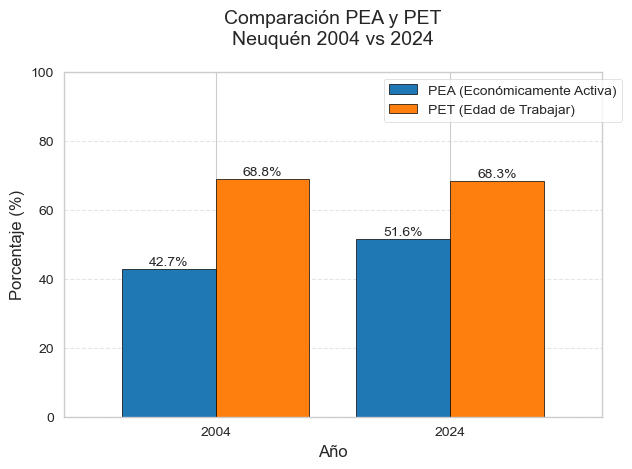

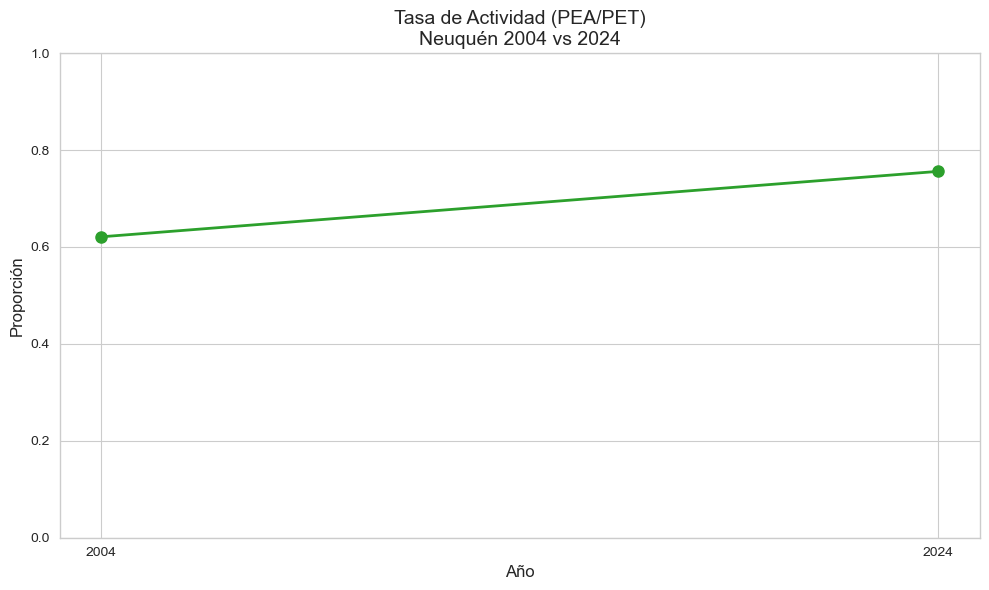

In [32]:
#Punto 7 y 8

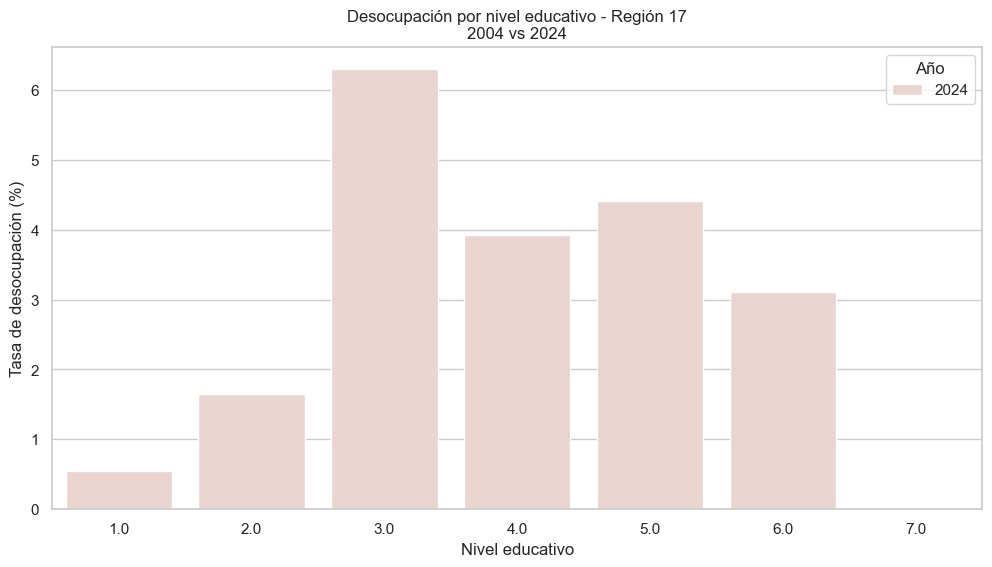

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos 
data_2004 = pd.read_stata('usu_individual_T104.dta', convert_categoricals=False)
data_2024 = pd.read_excel('usu_individual_T124.xlsx')

# Seleccionar región 
region_seleccionada = 17 

# Filtrar por región y unificar
data_2004 = data_2004[data_2004['aglomerado'] == region_seleccionada].copy()
data_2024 = data_2024[data_2024['AGLOMERADO'] == region_seleccionada].copy()

# Agregar año y resetear índices para evitar duplicados
data_2004['ANO'] = 2004
data_2024['ANO'] = 2024

# Resetear índices antes de concatenar
data_2004.reset_index(drop=True, inplace=True)
data_2024.reset_index(drop=True, inplace=True)

# Unir los datos asegurando índices únicos
data_completa = pd.concat([data_2004, data_2024], ignore_index=True)

# Crear base respondenta
respondenta = data_completa[data_completa['ESTADO'] != 0].copy()
respondenta.reset_index(drop=True, inplace=True)  # Resetear índice nuevamente

# Crear variable desocupado (1=desocupado, 0=otro)
respondenta['desocupado'] = (respondenta['ESTADO'] == 2).astype(int)

# Configuración estética para los gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# 9a. Gráfico de desocupación por nivel educativo
# Primero verificar que la variable NIVEL_ED existe
if 'NIVEL_ED' in respondenta.columns:
    plt.figure()
    # Agrupar y calcular porcentajes manualmente para evitar el error
    grouped = respondenta.groupby(['ANO', 'NIVEL_ED'])['desocupado'].mean().reset_index()
    grouped['porcentaje'] = grouped['desocupado'] * 100
    
    ax = sns.barplot(
        data=grouped,
        x='NIVEL_ED',
        y='porcentaje',
        hue='ANO',
        errorbar=None
    )
    plt.title(f'Desocupación por nivel educativo - Región {region_seleccionada}\n2004 vs 2024')
    plt.ylabel('Tasa de desocupación (%)')
    plt.xlabel('Nivel educativo')
    plt.legend(title='Año')
    plt.show()
else:
    print("Advertencia: La columna 'NIVEL_ED' no existe en los datos")


C:\Users\Fran\AppData\Local\Temp\ipykernel_36212\205786886.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_age = respondenta.groupby(['ANO', 'grupo_edad'])['desocupado'].mean().reset_index()


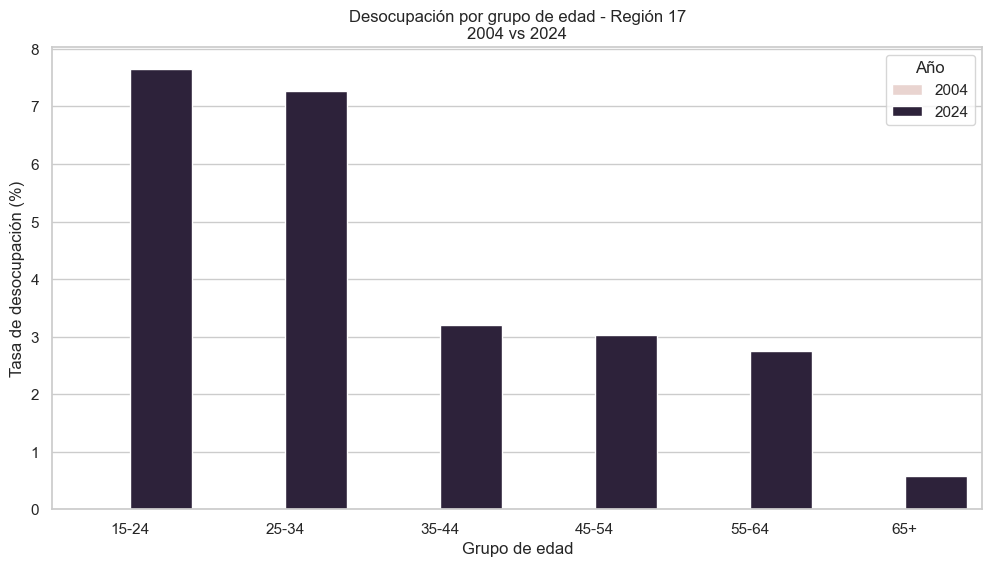

In [17]:
# 9b. Gráfico de desocupación por grupos de edad
if 'CH06' in respondenta.columns:
    respondenta['grupo_edad'] = pd.cut(
        respondenta['CH06'],
        bins=[15, 25, 35, 45, 55, 65, 99],
        labels=['15-24', '25-34', '35-44', '45-54', '55-64', '65+'],
        right=False
    )
    
    # Agrupar manualmente
    grouped_age = respondenta.groupby(['ANO', 'grupo_edad'])['desocupado'].mean().reset_index()
    grouped_age['porcentaje'] = grouped_age['desocupado'] * 100
    
    plt.figure()
    ax = sns.barplot(
        data=grouped_age,
        x='grupo_edad',
        y='porcentaje',
        hue='ANO',
        errorbar=None
    )
    plt.title(f'Desocupación por grupo de edad - Región {region_seleccionada}\n2004 vs 2024')
    plt.ylabel('Tasa de desocupación (%)')
    plt.xlabel('Grupo de edad')
    plt.legend(title='Año')
    plt.show()
    

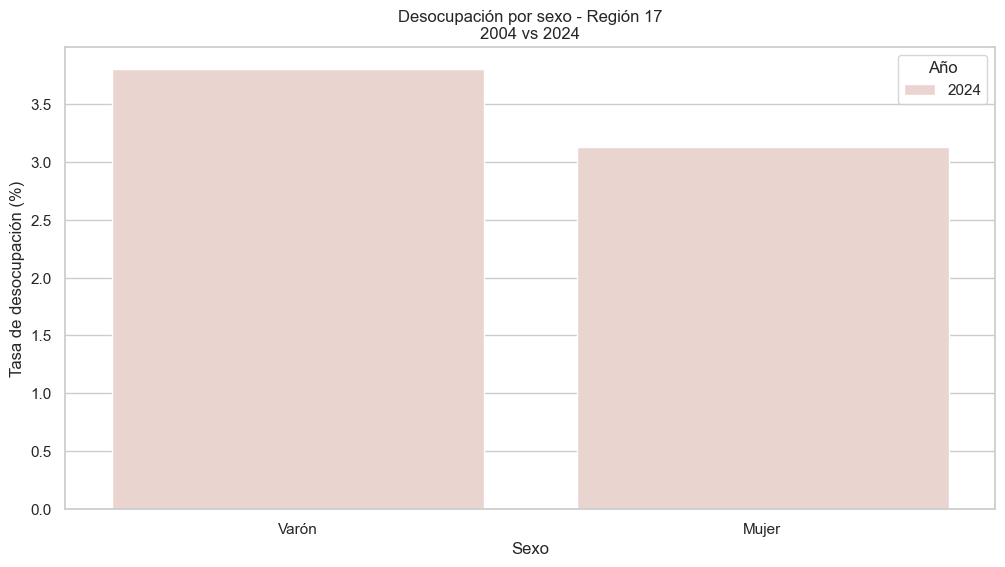


RESULTADOS NUMÉRICOS:
Total respondieron condición de actividad: 1939
Desocupados en 2004: 0
Desocupados en 2024: 40


In [15]:
# 9c. Gráfico de desocupación por sexo
if 'CH04' in respondenta.columns:
    grouped_sex = respondenta.groupby(['ANO', 'CH04'])['desocupado'].mean().reset_index()
    grouped_sex['porcentaje'] = grouped_sex['desocupado'] * 100
    
    plt.figure()
    ax = sns.barplot(
        data=grouped_sex,
        x='CH04',
        y='porcentaje',
        hue='ANO',
        errorbar=None
    )
    plt.title(f'Desocupación por sexo - Región {region_seleccionada}\n2004 vs 2024')
    plt.ylabel('Tasa de desocupación (%)')
    plt.xlabel('Sexo')
    plt.xticks([0, 1], ['Varón', 'Mujer'])
    plt.legend(title='Año')
    plt.show()

# Resultados numéricos
print("\nRESULTADOS NUMÉRICOS:")
print(f"Total respondieron condición de actividad: {len(respondenta)}")
print(f"Desocupados en 2004: {respondenta[(respondenta['ANO'] == 2004) & (respondenta['desocupado'] == 1)].shape[0]}")
print(f"Desocupados en 2024: {respondenta[(respondenta['ANO'] == 2024) & (respondenta['desocupado'] == 1)].shape[0]}")